# Mathematical Tools

Topics:
* Approximation
* Convex Optimization
* Integration
* Symbolic Mathematics

## Approximation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(x):
    return np.sin(x) + 0.5 * x

In [3]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 50)

Text(0,0.5,'f(x)')

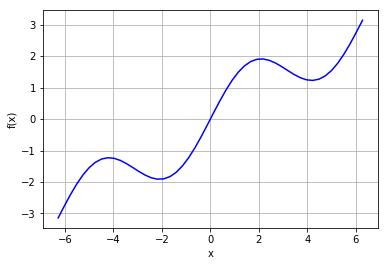

In [4]:
plt.plot(x, f(x), 'b')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

### Regression

$$\underset{\alpha_1,...,\alpha_D}{\text{min}}\frac{1}{I}\sum^I_{d=1}\Big(y_i-\sum^D_{d=1}\alpha_d \cdot b_d\big(x_i\big)\Big)^2$$

#### Use Monomial Basis Functions

In [5]:
reg = np.polyfit(x, f(x), deg=1)
ry = np.polyval(reg, x)

Text(0,0.5,'f(x)')

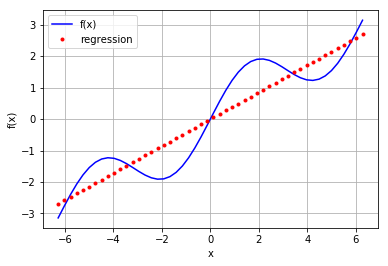

In [6]:
plt.plot(x, f(x), 'b', label='f(x)')
plt.plot(x, ry, 'r.', label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

In [7]:
np.sum((f(x) - ry) ** 2) / len(x)

0.4206477371868664

#### Use Individual Basis Functions

In [8]:
matrix = np.zeros((4, len(x)))
matrix[3, :] = x ** 3
matrix[2, :] = x ** 2
matrix[1, :] = x
matrix[0, :] = 1

In [9]:
reg = np.linalg.lstsq(matrix.T, f(x))[0]

/Users/chuang/Applications/miniconda3/envs/PyQuant/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


In [10]:
reg

array([ 1.52685368e-14,  5.62777448e-01, -1.11022302e-15, -5.43553615e-03])

In [11]:
ry = np.dot(reg, matrix)

Text(0,0.5,'f(x)')

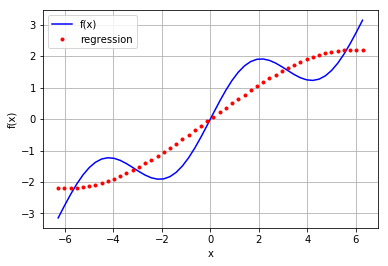

In [12]:
plt.plot(x, f(x), 'b', label='f(x)')
plt.plot(x, ry, 'r.', label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

/Users/chuang/Applications/miniconda3/envs/PyQuant/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


Text(0,0.5,'f(x)')

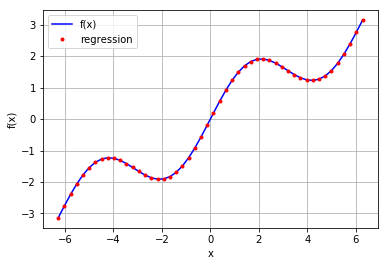

In [13]:
matrix[3, :] = np.sin(x)
reg = np.linalg.lstsq(matrix.T, f(x))[0]
ry = np.dot(reg, matrix)
plt.plot(x, f(x), 'b', label='f(x)')
plt.plot(x, ry, 'r.', label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

In [14]:
np.allclose(f(x), ry)

True

In [15]:
np.sum((f(x) - ry) ** 2) / len(x)

1.8541312760604798e-31

In [16]:
reg

array([9.26243218e-17, 5.00000000e-01, 0.00000000e+00, 1.00000000e+00])

#### Noisy Data

In [17]:
xn = np.linspace(-2 * np.pi, 2 * np.pi, 50)
xn = xn + 0.15 * np.random.standard_normal(len(xn))
yn = f(xn) + 0.25 * np.random.standard_normal(len(xn))

In [18]:
reg = np.polyfit(xn, yn, 7)
ry = np.polyval(reg, xn)

Text(0,0.5,'f(x)')

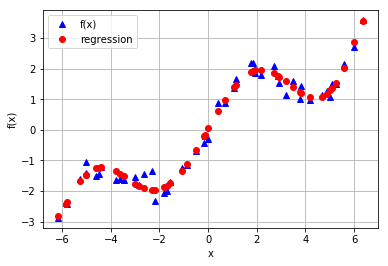

In [19]:
plt.plot(xn, yn, 'b^', label='f(x)')
plt.plot(xn, ry, 'ro', label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

#### Unsorted Data

In [20]:
xu = np.random.rand(50) * 4 * np.pi - 2 * np.pi
yu = f(xu)

In [21]:
print(xu[:10].round(2))
print(yu[:10].round(2))

[ 0.44  4.04 -4.19 -2.21 -5.72  1.24 -5.16  2.4  -4.54  2.85]
[ 0.64  1.24 -1.23 -1.91 -2.33  1.56 -1.67  1.88 -1.29  1.71]


In [22]:
reg = np.polyfit(xu, yu, 5)
ry = np.polyval(reg, xu)

Text(0,0.5,'f(x)')

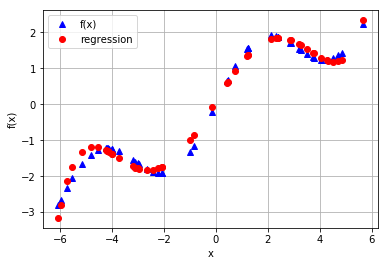

In [23]:
plt.plot(xu, yu, 'b^', label='f(x)')
plt.plot(xu, ry, 'ro', label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

#### Multiple Dimensions

In [24]:
def fm(x, y):
    return np.sin(x) + 0.25 * x + np.sqrt(y) + 0.05 * y ** 2

In [25]:
x = np.linspace(0, 10, 20)
y = np.linspace(0, 10, 20)
X, Y = np.meshgrid(x, y)
Z = fm(X, Y)
x = X.flatten()
y = Y.flatten()

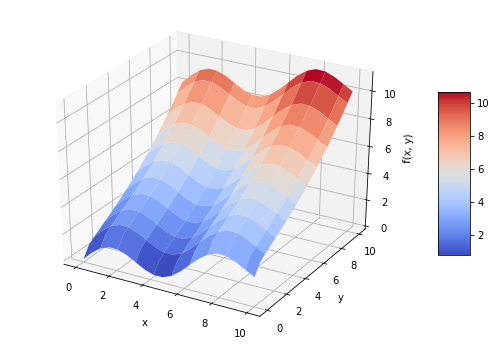

In [26]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl

fig = plt.figure(figsize=(9, 6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=2, cstride=2,
                      cmap=mpl.cm.coolwarm,
                      lw=0.5, antialiased=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5)

In [27]:
matrix = np.zeros((len(x), 7))
matrix[:, 6] = np.sqrt(y)
matrix[:, 5] = np.sin(x)
matrix[:, 4] = y ** 2
matrix[:, 3] = x ** 2
matrix[:, 2] = y
matrix[:, 1] = x
matrix[:, 0] = 1

In [28]:
import statsmodels.api as sm
model = sm.OLS(fm(x, y), matrix).fit()

/Users/chuang/Applications/miniconda3/envs/PyQuant/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/chuang/Applications/miniconda3/envs/PyQuant/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/chuang/Applications/miniconda3/envs/PyQuant/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [29]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.953e+30
Date:                Sun, 19 Aug 2018   Prob (F-statistic):               0.00
Time:                        15:17:03   Log-Likelihood:                 12175.
No. Observations:                 400   AIC:                        -2.434e+04
Df Residuals:                     393   BIC:                        -2.431e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.163e-15   3.77e-15     -1.104      0.270   -1.16e-14    3.25e-15
x1             0.2500   9.79e-16   2.55e+14      0.000       0.250       0.250
x2         -4.247e-15   3.19e-15     -1.330      0.184   -1.05e-14    2.03e-15
x3           -3.4e-16   9.41e-17     -3.613      0.000   -5.25e-16   -1.55e-16
x4             0.0500   1.66e-16   3.01e+14      0.000       0.050       0.050
x5             1.0000   1.17e-15   8.53e+14      0.000       1.000       1.000
x6             1.0000   6.25e-15    1.6e+14      0.000       1.000       1.000
==============================================================================
Omnibus:                       31.276   Durbin-Watson:                   0.154
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.656
Skew:                           0.692   Prob(JB):                     2.98e-08
Kurtosis:                       2.593   Cond. No.                         587.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
a = model.params
def reg_func(a, x, y):
    f6 = a[6] * np.sqrt(y)
    f5 = a[5] * np.sin(x)
    f4 = a[4] * y ** 2
    f3 = a[3] * x ** 2
    f2 = a[2] * y
    f1 = a[1] * x
    f0 = a[0] * 1
    return f6 + f5 + f4 + f3 + f2 + f1 + f0

In [31]:
RZ = reg_func(a, X, Y)

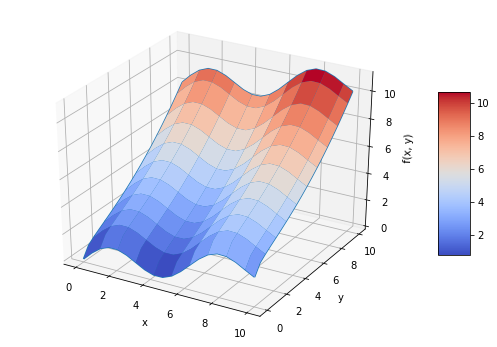

In [32]:
fig = plt.figure(figsize=(9, 6))
ax = fig.gca(projection='3d')
surf1 = ax.plot_surface(X, Y, Z, rstride=2, cstride=2,
                      cmap=mpl.cm.coolwarm,
                      lw=0.5, antialiased=True)
surf2 = ax.plot_wireframe(X, Y, RZ, rstride=2, cstride=2,
                         label='regression')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5)

### Interpolation

In [33]:
import scipy.interpolate as spi

In [34]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 25)

In [35]:
def f(x):
    return np.sin(x) + 0.5 * x

In [36]:
ipo = spi.splrep(x, f(x), k=1)

In [37]:
iy = spi.splev(x, ipo)

Text(0,0.5,'f(x)')

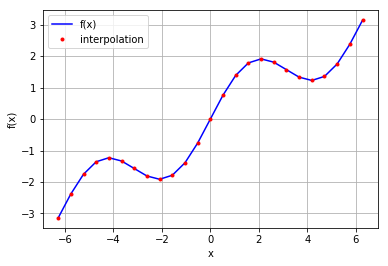

In [38]:
plt.plot(x, f(x), 'b', label='f(x)')
plt.plot(x, iy, 'r.', label='interpolation')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

In [39]:
np.allclose(f(x), iy)

True

In [40]:
xd = np.linspace(1., 3., 50)
iyd = spi.splev(xd, ipo)

Text(0,0.5,'f(x)')

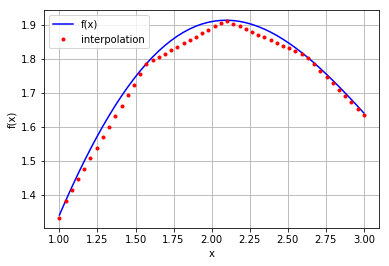

In [41]:
plt.plot(xd, f(xd), 'b', label='f(x)')
plt.plot(xd, iyd, 'r.', label='interpolation')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

In [42]:
ipo = spi.splrep(x, f(x), k=3)
iyd = spi.splev(xd, ipo)

Text(0,0.5,'f(x)')

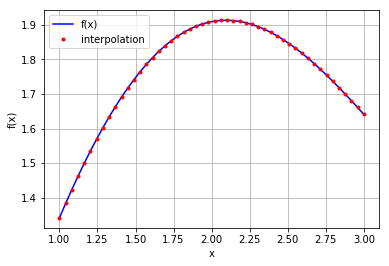

In [43]:
plt.plot(xd, f(xd), 'b', label='f(x)')
plt.plot(xd, iyd, 'r.', label='interpolation')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

In [44]:
np.allclose(f(xd), iyd)

False

In [45]:
np.sum((f(xd) - iyd) ** 2) / len(xd)

1.1349319851436892e-08

## Convex Opitimization

In [46]:
def fm(x, y):
    return np.sin(x) + 0.05 * x ** 2 + np.sin(y) + 0.05 * y ** 2

In [47]:
x = np.linspace(-10, 10, 50)
y = np.linspace(-10, 10, 50)
X, Y = np.meshgrid(x, y)
Z = fm(X, Y)

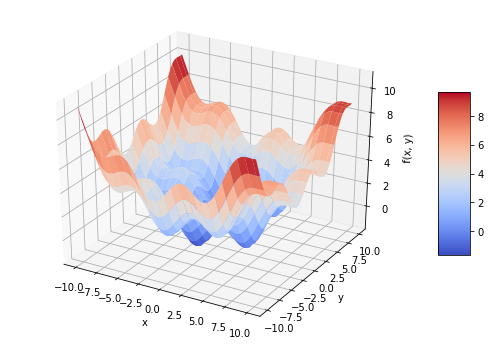

In [48]:
fig = plt.figure(figsize=(9, 6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=2, cstride=2,
                      cmap=mpl.cm.coolwarm,
                      lw=0.5, antialiased=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5)

In [49]:
import scipy.optimize as spo

### Global Optimization

In [50]:
def fo(grid):
    x, y = grid
    z = np.sin(x) + 0.05 * x ** 2 + np.sin(y) + 0.05 * y ** 2
    if output == True:
        print(x, y, z)
    return z

In [51]:
output = True
grid = (slice(-10, 10.1, 5), slice(-10, 10.1, 5))
spo.brute(fo, grid, finish=None)

-10.0 -10.0 11.088042221778739
-10.0 -10.0 11.088042221778739
-10.0 -5.0 7.752945385552508
-10.0 0.0 5.5440211108893696
-10.0 5.0 5.835096836226231
-10.0 10.0 10.0
-5.0 -10.0 7.752945385552509
-5.0 -5.0 4.417848549326277
-5.0 0.0 2.2089242746631386
-5.0 5.0 2.5
-5.0 10.0 6.664903163773769
0.0 -10.0 5.5440211108893696
0.0 -5.0 2.2089242746631386
0.0 0.0 0.0
0.0 5.0 0.29107572533686155
0.0 10.0 4.4559788891106304
5.0 -10.0 5.835096836226231
5.0 -5.0 2.5
5.0 0.0 0.29107572533686155
5.0 5.0 0.5821514506737231
5.0 10.0 4.747054614447491
10.0 -10.0 10.0
10.0 -5.0 6.664903163773769
10.0 0.0 4.4559788891106304
10.0 5.0 4.747054614447492
10.0 10.0 8.911957778221261


array([0., 0.])

In [52]:
output = False
grid = (slice(-10, 10.1, 0.1), slice(-10, 10.1, 0.1))
opt1 = spo.brute(fo, grid, finish=None)

opt1

array([-1.4, -1.4])

In [53]:
fm(opt1[0], opt1[1])

-1.7748994599769203

### Local Optimization

In [54]:
output = True
opt2 = spo.fmin(fo, opt1, xtol=0.001, ftol=0.001, maxiter=15, maxfun=20)

opt2

-1.4000000000000004 -1.4000000000000004 -1.7748994599769203
-1.4700000000000004 -1.4000000000000004 -1.774329079766041
-1.4000000000000004 -1.4700000000000004 -1.7743290797660412
-1.3300000000000003 -1.4700000000000006 -1.7695827276986251
-1.4350000000000005 -1.4175000000000004 -1.7756403866946224
-1.4350000000000005 -1.3475000000000004 -1.7722175692069706
-1.4087500000000004 -1.4393750000000005 -1.7754569915832503
-1.4437500000000005 -1.4568750000000006 -1.7751135039067365
-1.4328125000000007 -1.4426562500000006 -1.7755861787931349
-1.4590625000000008 -1.4207812500000006 -1.7751589553124218
-1.4213281250000005 -1.4347265625000005 -1.7756764959744498
-1.4235156250000003 -1.4095703125000005 -1.7755407435528803
-1.4304882812500006 -1.4343847656250006 -1.775695506287223
-1.4168164062500006 -1.4516113281250007 -1.7753471595488823
-1.4304541015625005 -1.4260278320312505 -1.7757197974424463
-1.4396142578125009 -1.4256860351562504 -1.77564443394365
-1.4258996582031256 -1.4324664306640629 -1.7

array([-1.42702972, -1.42876755])

In [55]:
fm(opt2[0], opt2[1])

-1.7757246992239009

In [56]:
# Basin Hopping

output = False
spo.fmin(fo, (2.0, 2.0), maxiter=250)

Optimization terminated successfully.
         Current function value: 0.015826
         Iterations: 46
         Function evaluations: 86


array([4.2710728 , 4.27106945])

### Constrained Optimization

Consider the utility optimization problem of an investor who can invest in two risky securities. Both securities cost $q_a=q_b=10$ today. After one year, they have a payoff of 15 USD and 5 USD, respectively, in state $u$, and of 5 USD and 12 USD, respectively, in state $d$. Both states are equally likely. Denote the vector payoffs for the two securities by $r_a$ and $r_b$, respectively.

The investor has a budget of $w_0=100$ USD to invest and derives utility from future wealth according to the utility function $u(w)=\sqrt{w}$, where $w$ is the wealth (USD amount) available. 

In [57]:
def Eu(grid):
    s, b = grid
    return -(0.5 * np.sqrt(s * 15 + b * 5) + 0.5 * np.sqrt(s * 5 + b * 12))

def constraint(grid):
    s, b = grid
    return 100 - s * 10 - b * 10

cons = ({'type': 'ineq', 'fun': constraint})
bnds = ((0, 1000), (0, 1000))

In [58]:
result = spo.minimize(Eu, [5, 5], method='SLSQP', bounds=bnds, constraints=cons)

In [59]:
result

     fun: -9.700883611487832
     jac: array([-0.48508096, -0.48489535])
 message: 'Optimization terminated successfully.'
    nfev: 21
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([8.02547122, 1.97452878])

In [60]:
result['x']

array([8.02547122, 1.97452878])

In [61]:
np.dot(result['x'], [10, 10]) # The budget constraint is binding!

99.99999999999999

## Integration

Integration is an important mathematical tools when it comes to valuation and option pricing. This stems from the fact that risk-neutral values of derivatives can be expressed in general as the discounted *expectation* of their payoff under the risk-neutral (martingale) measure.

In [62]:
import scipy.integrate as sci

In [63]:
def f(x):
    return np.sin(x) + 0.5 * x

In [64]:
a = 0.5
b = 9.5
x = np.linspace(0, 10)
y = f(x)

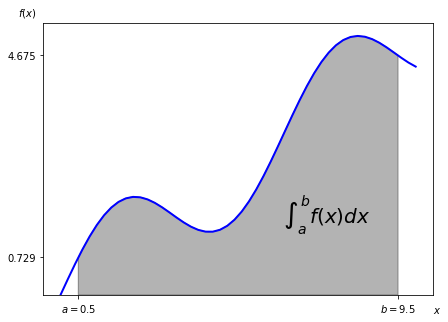

In [65]:
from matplotlib.patches import Polygon

fig, ax = plt.subplots(figsize=(7, 5))
plt.plot(x, y, 'b', lw=2)
plt.ylim(ymin=0)

Ix = np.linspace(a, b)
Iy = f(Ix)
verts = [(a, 0)] + list(zip(Ix, Iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='0.7', edgecolor='0.5')
ax.add_patch(poly)

plt.text(0.75 * (a + b), 1.4, r"$\int_a^b f(x)dx$",
        horizontalalignment='center', fontsize=20)
plt.figtext(0.9, 0.075, '$x$')
plt.figtext(0.075, 0.9, '$f(x)$')

ax.set_xticks((a, b))
ax.set_xticklabels(('$a=0.5$', '$b=9.5$'))
ax.set_yticks((f(a), f(b)))

### Numerical Integration

In [66]:
sci.fixed_quad(f, a, b)[0] # fixed Gaussian quadrature

24.366995967084602

In [67]:
sci.quad(f, a, b)[0] # adaptive quadrature

24.374754718086752

In [68]:
sci.romberg(f, a, b) # romberg integration

24.374754718086713

In [69]:
xi = np.linspace(0.5, 9.5, 25)

In [70]:
sci.trapz(f(xi), xi) # trapezoidal rule

24.352733271544516

In [71]:
sci.simps(f(xi), xi) # Simpson's rule

24.37496418455075

### Integration by Simulation

In [72]:
for i in range(1, 20):
    np.random.seed(1000)
    x = np.random.random(i * 10) * (b - a) + a
    print(np.sum(f(x)) / len(x) * (b - a))

24.804762279331463
26.522918898332378
26.265547519223976
26.02770339943824
24.99954181440844
23.881810141621663
23.527912274843253
23.507857658961207
23.67236746066989
23.679410416062886
24.424401707879305
24.239005346819056
24.115396924962802
24.424191987566726
23.924933080533783
24.19484212027875
24.117348378249833
24.100690929662274
23.76905109847816


## Symbolic Computation

In [73]:
import sympy as sy

### Basics

In [74]:
x = sy.Symbol('x')
y = sy.Symbol('y')

In [75]:
type(x)

sympy.core.symbol.Symbol

In [76]:
sy.sqrt(x)

sqrt(x)

In [77]:
3 + sy.sqrt(x) - 4 ** 2

sqrt(x) - 13

In [78]:
f = x ** 2 + 0.5 * x ** 2 + 3 / 2

In [79]:
sy.simplify(f)

1.5*x**2 + 1.5

In [80]:
sy.init_printing(pretty_print=False, use_unicode=False)

In [81]:
print(sy.pretty(f))

     2      
1.5*x  + 1.5


In [82]:
print(sy.pretty(sy.sqrt(x) + 0.5))

  ___      
\/ x  + 0.5


In [83]:
pi_str = str(sy.N(sy.pi, 100))
pi_str[:40]

'3.14159265358979323846264338327950288419'

In [84]:
pi_str[-40:]

'4592307816406286208998628034825342117068'

In [85]:
pi_str.find('15926')

4

### Equations

In [86]:
sy.solve(x ** 2 - 1)

[-1, 1]

In [87]:
sy.solve(x ** 3 + 0.5 * x ** 2 - 1)

[0.858094329496553, -0.679047164748276 - 0.839206763026694*I, -0.679047164748276 + 0.839206763026694*I]

In [88]:
sy.solve(x ** 2 + y ** 2)

[{x: -I*y}, {x: I*y}]

### Integration

In [89]:
a, b = sy.symbols('a b')

In [90]:
print(sy.pretty(sy.Integral(sy.sin(x) + 0.5 * x, (x, a, b))))

  b                    
  /                    
 |                     
 |  (0.5*x + sin(x)) dx
 |                     
/                      
a                      


In [91]:
int_func = sy.integrate(sy.sin(x) + 0.5 * x, x)

In [92]:
print(sy.pretty(int_func))

      2         
0.25*x  - cos(x)


In [93]:
Fb = int_func.subs(x, 9.5).evalf()
Fa = int_func.subs(x, 0.5).evalf()

In [94]:
Fb - Fa

24.3747547180867

In [95]:
int_func_limits = sy.integrate(sy.sin(x) + 0.5 * x, (x, a, b))
print(sy.pretty(int_func_limits))

        2         2                  
- 0.25*a  + 0.25*b  + cos(a) - cos(b)


In [96]:
int_func_limits.subs({a : 0.5, b : 9.5}).evalf()

24.3747547180868

In [97]:
sy.integrate(sy.sin(x) + 0.5 * x, (x, 0.5, 9.5))

24.3747547180867

### Differentiation

In [98]:
int_func.diff()

0.5*x + sin(x)

In [99]:
f = sy.sin(x) + 0.05 * x ** 2 + sy.sin(y) + 0.05 * y ** 2

In [100]:
del_x = sy.diff(f, x)
del_x

0.1*x + cos(x)

In [101]:
del_y = sy.diff(f, y)
del_y

0.1*y + cos(y)

In [102]:
xo = sy.nsolve(del_x, -1.5)
xo

-1.42755177876459

In [103]:
yo = sy.nsolve(del_y, -1.5)
yo

-1.42755177876459

In [104]:
f.subs({x : xo, y : yo}).evalf()

-1.77572565314742

In [105]:
# uneducated guess might trap the algorithm in a local minimum instead of a global one

xo = sy.nsolve(del_x, 1.5)
yo = sy.nsolve(del_y, 1.5)
f.subs({x : xo, y : yo}).evalf()

2.27423381055640